<a href="https://colab.research.google.com/github/brunomoneymetrics/Estatisticas-Descritivas-Univariadas/blob/main/ibovanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice

1. [Importando as bibliotecas necessárias](#importando-as-bibliotecas-necessárias)
2. [Importação dos dados e exploração rápida](#importação-dos-dados-e-exploração-rápida)
3. [Análise Exploratória de Dados](#análise-exploratória-de-dados)
    - [Visualização](##visualização)
    - [Análise de Retorno](##análise-de-retorno)
    - [Análise de Outliers](##análise-de-outliers)
4. [Conclusão](#conclusão)


# Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import yfinance as yf
import scipy.stats as sci
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Importação dos dados e exploração rápida

In [2]:
# Coletando dados do índice ibovesp
ticker = "^BVSP"
tkr = yf.Ticker(ticker)
df = tkr.history(period='10y')

In [3]:
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-06-03 00:00:00-03:00,51606.0,52032.0,51377.0,52032.0,2859400,0.0,0.0
2014-06-04 00:00:00-03:00,52032.0,52032.0,51609.0,51833.0,2571500,0.0,0.0
2014-06-05 00:00:00-03:00,51833.0,52245.0,51470.0,51559.0,2890000,0.0,0.0
2014-06-06 00:00:00-03:00,51562.0,53175.0,51562.0,53129.0,4298400,0.0,0.0
2014-06-09 00:00:00-03:00,53129.0,54462.0,53091.0,54273.0,3660000,0.0,0.0
2014-06-10 00:00:00-03:00,54273.0,54604.0,53960.0,54604.0,3729900,0.0,0.0
2014-06-11 00:00:00-03:00,54676.0,55284.0,54676.0,55102.0,3796000,0.0,0.0
2014-06-13 00:00:00-03:00,55102.0,55104.0,54649.0,54807.0,2664400,0.0,0.0
2014-06-16 00:00:00-03:00,54807.0,54855.0,54475.0,54630.0,2637400,0.0,0.0


In [4]:
# Criando um outro Dataframe para análise
ibov_df = df['Close']
ibov_df = pd.DataFrame(ibov_df)

In [5]:
ibov_df['Close']

Date
2014-06-03 00:00:00-03:00     52032.00
2014-06-04 00:00:00-03:00     51833.00
2014-06-05 00:00:00-03:00     51559.00
2014-06-06 00:00:00-03:00     53129.00
2014-06-09 00:00:00-03:00     54273.00
                               ...    
2024-05-27 00:00:00-03:00    124496.00
2024-05-28 00:00:00-03:00    123780.00
2024-05-29 00:00:00-03:00    122707.00
2024-05-31 00:00:00-03:00    122098.00
2024-06-03 00:00:00-03:00    121819.25
Name: Close, Length: 2478, dtype: float64

# Análise Exploratória de Dados

In [6]:
# Estatísticas Descritivas
print("Estatísticas Descritivas fundamentais: índice Ibovespa\n")
#Media
media = sts.mean(ibov_df['Close'])
print("Média: %2.f" %media)
#Desvio Padrão
desvio_padrao = sts.stdev(ibov_df['Close'])
print("Desvio Padrão: %2.f " %desvio_padrao)
#Mediana
mediana = sts.median(ibov_df['Close'])
print("Mediana: %2.f" %mediana)
#Moda
moda = sts.mode(ibov_df['Close'])
print("Moda: %2.f" %moda)
#Variancia
variancia = sts.variance(ibov_df['Close'])
print("Variancia: %2.f" %variancia)
#Assimetria
skewness = sci.skew(ibov_df['Close'])
print("Assimetria: %2.f" %skewness)
#Curtose
curtose = sci.kurtosis(ibov_df['Close'])
print("Curtose: %2.f" %curtose)
#Valor Máximo
maximo = ibov_df['Close'].max()
print("Valor maximo: %2.f" %maximo)
#Valor Mínimo
minimo = ibov_df['Close'].min()
print("Valor mínimo: %2.f" %minimo )
#Amplitude
rangee = maximo - minimo
print("Amplitude: %2.f" %rangee)
# Quartis
quartis = sts.quantiles(ibov_df['Close'])
print(f"Q1:{quartis[0]} Q2:{quartis[1]} Q3:{quartis[2]}")
#Quartis[1] == mediana # True, apenas um teste xD


Estatísticas Descritivas fundamentais: índice Ibovespa

Média: 87867
Desvio Padrão: 26777 
Mediana: 94596
Moda: 49246
Variancia: 716990897
Assimetria: -0
Curtose: -1
Valor maximo: 134194
Valor mínimo: 37497
Amplitude: 96697
Q1:61522.75 Q2:94595.5 Q3:111439.0


## Visualização

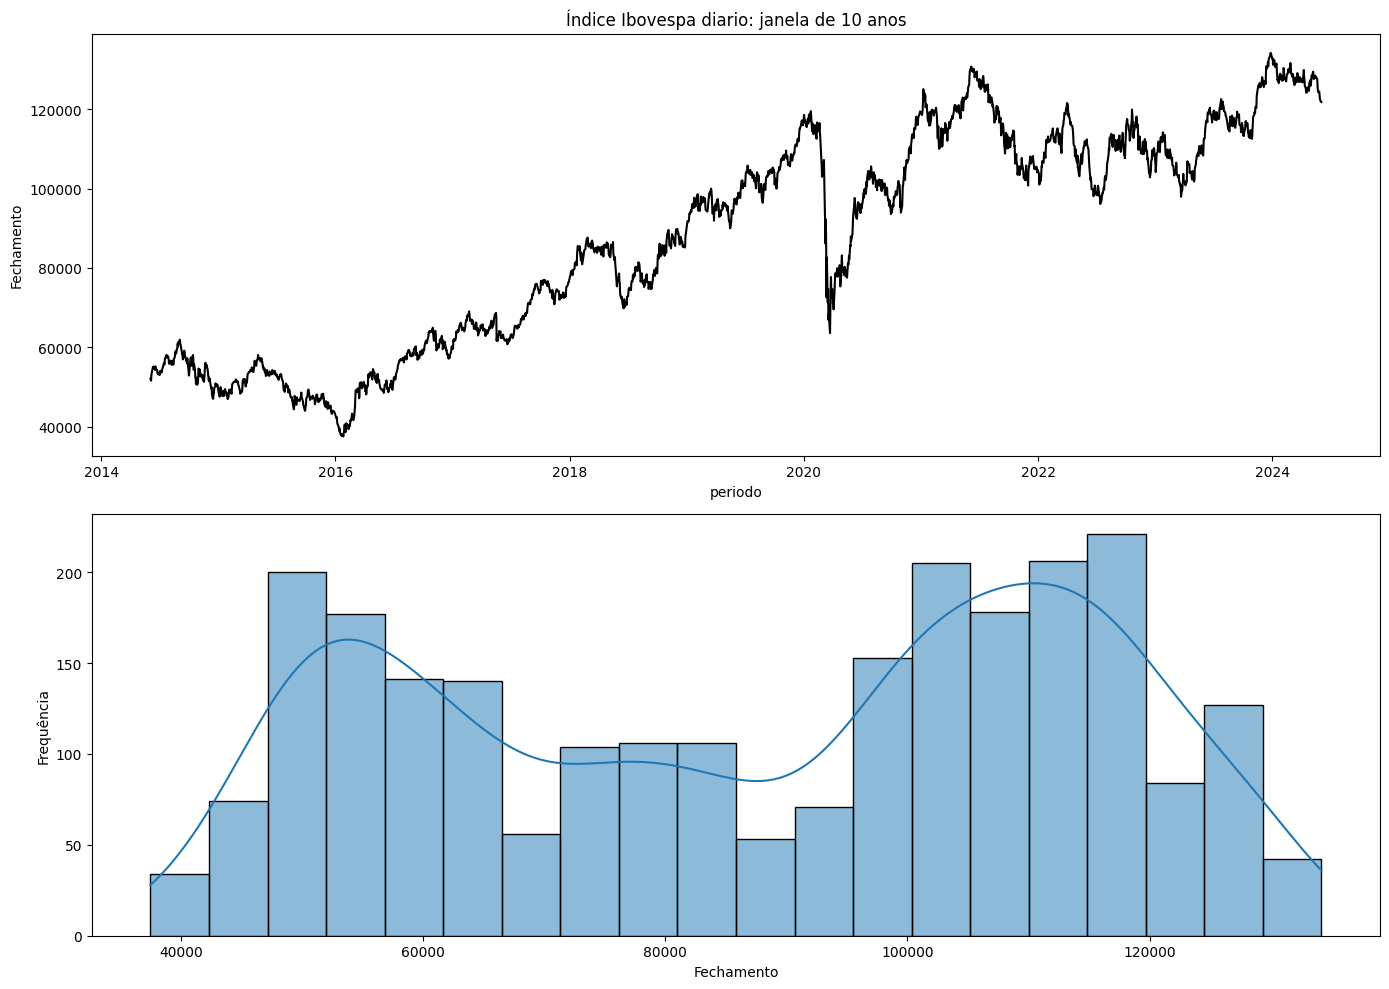

In [7]:
 #Gráfico Ibovespa
plt.figure(figsize= (14,10))
plt.subplot(211)
plt.plot(ibov_df, color ='black');
plt.xlabel("periodo")
plt.ylabel("Fechamento")
plt.title("Índice Ibovespa diario: janela de 10 anos");

#Histograma Fechamento ibovespa
plt.subplot(212)
sns.histplot(ibov_df['Close'], bins = 20, kde = True)
plt.ylabel("Frequência");
plt.xlabel("Fechamento");

plt.tight_layout()


## Análise do Retorno

In [8]:
#Cálculo do retorno
ibov_df_retorno = ibov_df
ibov_df_retorno['Retorno'] = ibov_df_retorno['Close'].pct_change()
ibov_df_retorno.dropna(inplace = True) # tem apenas um ponto de dado Nan
# Estatísticas Descritivas
print("Estatísticas Descritivas: Retornos do ibovespa \n")
#Media
media = sts.mean(ibov_df_retorno['Retorno'])
print("Média: %f" %media)
#Desvio Padrão
desvio_padrao = sts.stdev(ibov_df_retorno['Retorno'])
print("Desvio Padrão: %f " %desvio_padrao)
#Mediana
mediana = sts.median(ibov_df_retorno['Retorno'])
print("Mediana: %f" %mediana)
#Moda
moda = sts.mode(ibov_df_retorno['Retorno'])
print("Moda: %f" %moda)
#Variancia
variancia = sts.variance(ibov_df_retorno['Retorno'])
print("Variancia: %f" %variancia)
#Assimetria
skewness = sci.skew(ibov_df_retorno['Retorno'])
print("Assimetria: %f" %skewness)
#Curtose
curtose = sci.kurtosis(ibov_df_retorno['Retorno'])
print("Curtose: %f" %curtose)
#Valor Máximo
maximo = ibov_df_retorno['Retorno'].max()
print("Valor maximo: %f" %maximo)
#Valor Mínimo
minimo = ibov_df_retorno['Retorno'].min()
print("Valor mínimo: %f" %minimo )
#Amplitude
rangee = maximo - minimo
print("Amplitude: %f" %rangee)
# Quartis
quartis = sts.quantiles(ibov_df_retorno['Retorno'])
print(f"Q1:{quartis[0]} Q2:{quartis[1]} Q3:{quartis[2]}")


Estatísticas Descritivas: Retornos do ibovespa 

Média: 0.000466
Desvio Padrão: 0.015593 
Mediana: 0.000428
Moda: -0.003825
Variancia: 0.000243
Assimetria: -0.601396
Curtose: 12.219566
Valor maximo: 0.139082
Valor mínimo: -0.147797
Amplitude: 0.286879
Q1:-0.007641427586961569 Q2:0.00042750267189162194 Q3:0.00895375318259839


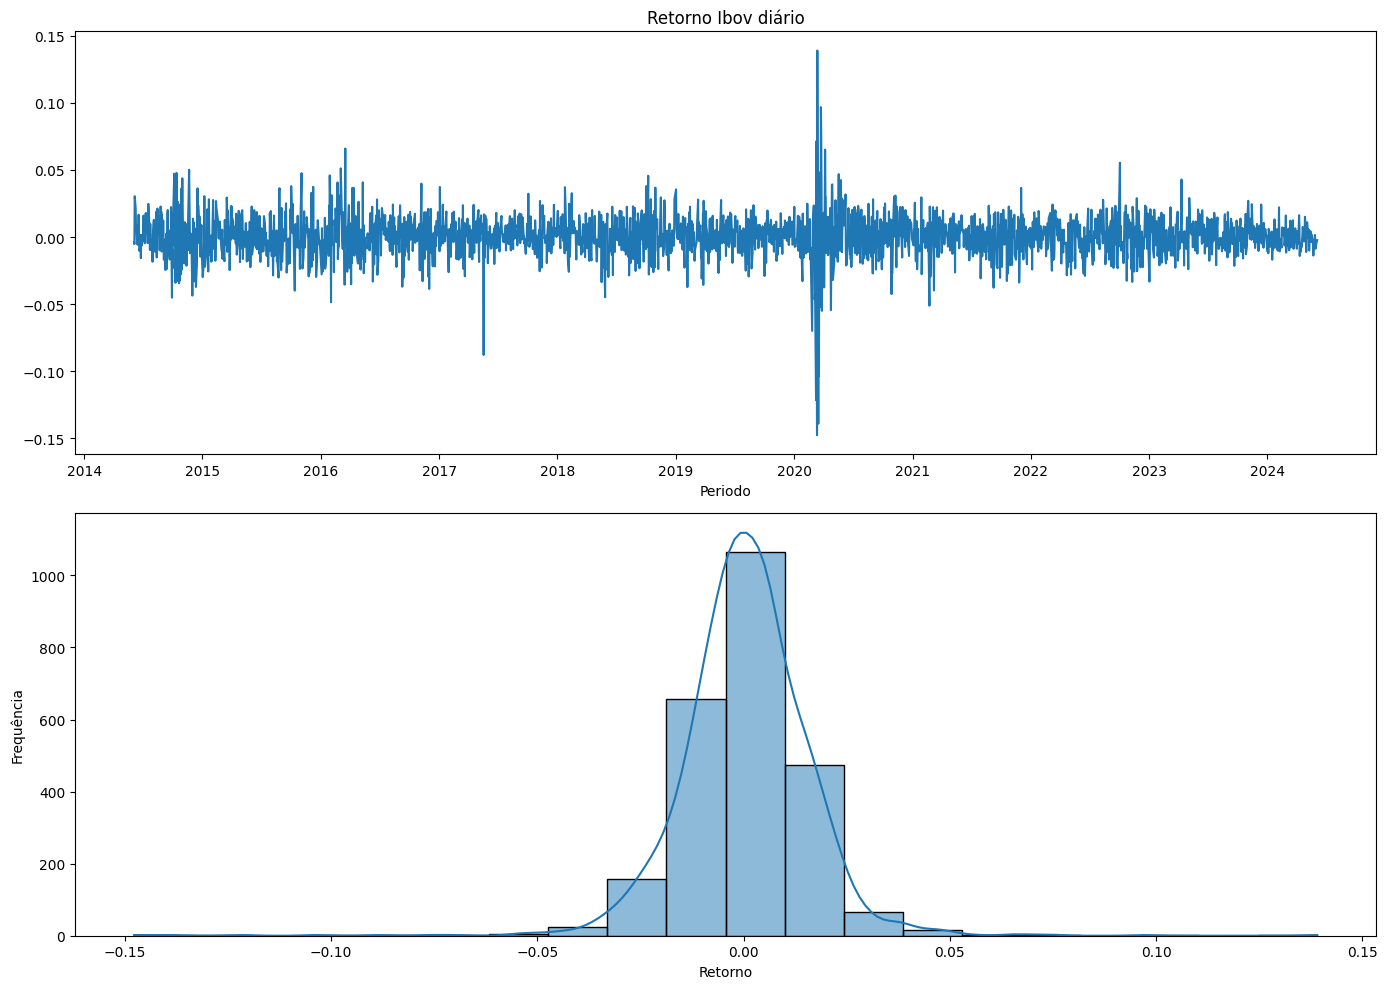

In [9]:
# Visualização retorno Ibovespa
plt.figure(figsize= (14,10))

#grafico retorno
plt.subplot(211)
plt.plot(ibov_df_retorno['Retorno'])
plt.xlabel("Periodo");
plt.title("Retorno Ibov diário")

#Histograma retorno
plt.subplot(212)
sns.histplot(ibov_df_retorno['Retorno'], bins = 20, kde = True)
plt.ylabel("Frequência");
plt.xlabel("Retorno");

plt.tight_layout()

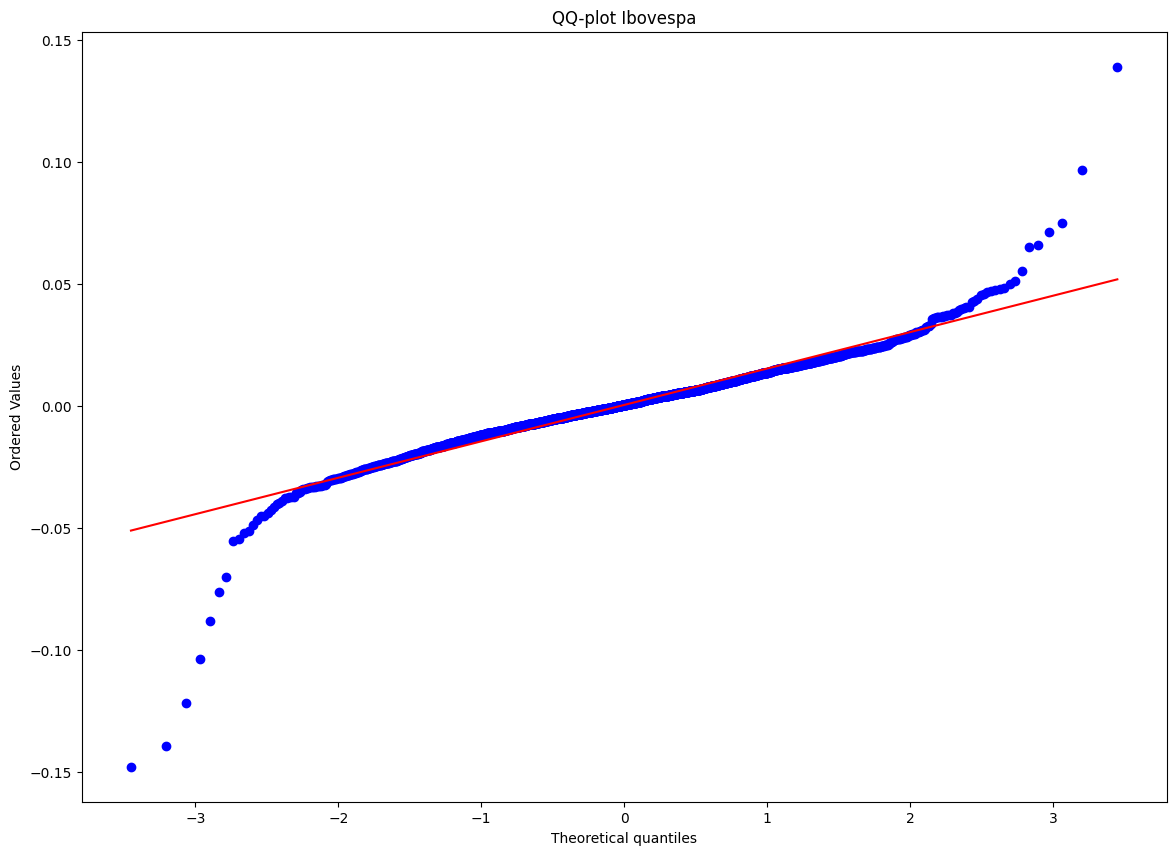

In [10]:
# QQ-plot
plt.figure(figsize=(14,10))
sci.probplot(ibov_df_retorno['Retorno'], dist="norm", plot = plt);
plt.title("QQ-plot Ibovespa");

## Análise de outliers

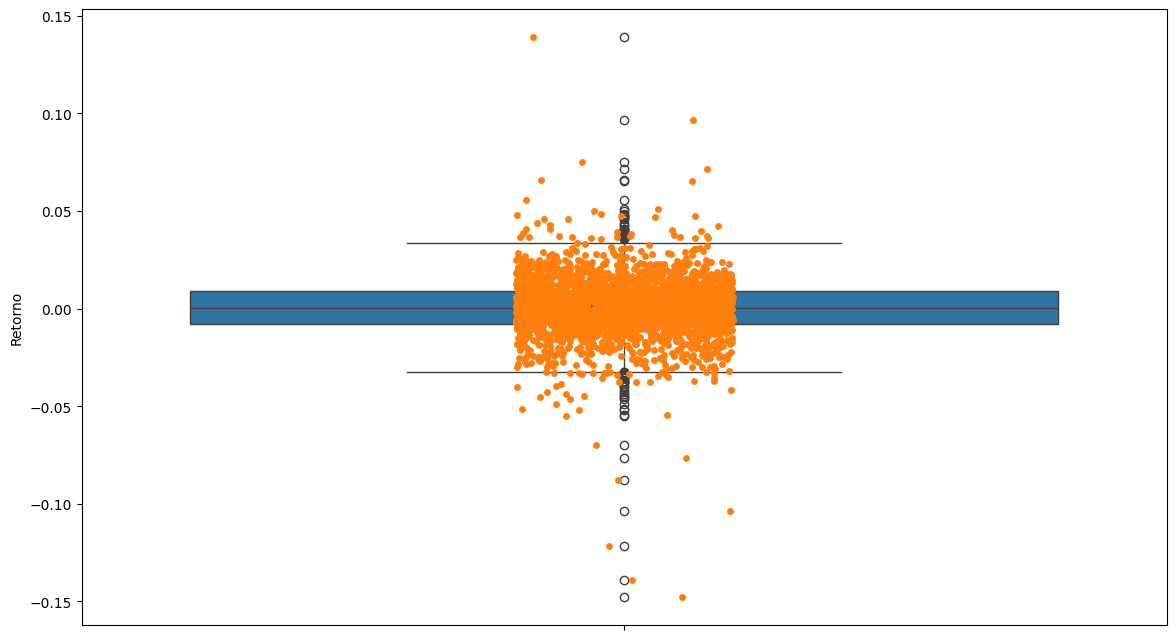

In [11]:
#boxplot
plt.figure(figsize=(14,8))
sns.boxplot(ibov_df_retorno['Retorno']);
sns.stripplot(ibov_df_retorno['Retorno'],marker='o');

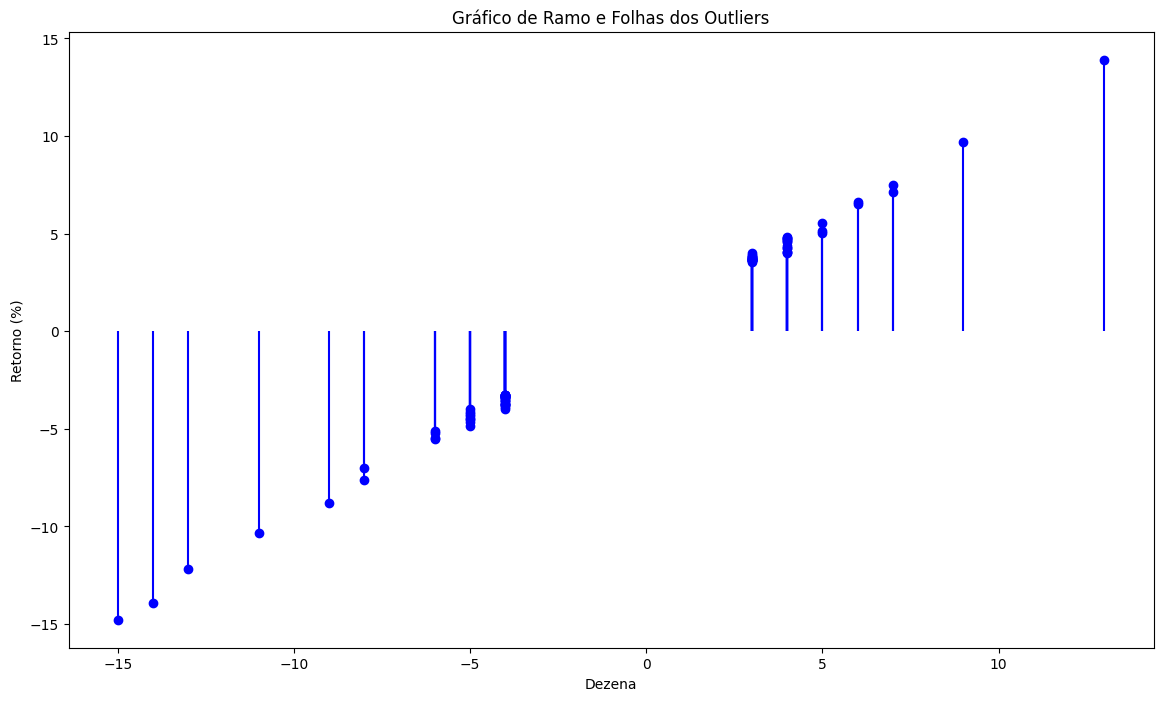

In [12]:
# Calcular os quartis
Q1 = ibov_df_retorno['Retorno'].quantile(0.25)
Q3 = ibov_df_retorno['Retorno'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Calcular os limites superior e inferior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = ibov_df_retorno[(ibov_df_retorno['Retorno'] < limite_inferior) | (ibov_df_retorno['Retorno'] > limite_superior)]['Retorno']

# Criar o gráfico de ramo e folhas
plt.figure(figsize=(14,8))
plt.stem(np.floor(outliers * 100), outliers * 100, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.xlabel('Dezena');
plt.ylabel('Retorno (%)');
plt.title('Gráfico de Ramo e Folhas dos Outliers');


In [13]:
#identificando outliers extremos
limite_extremo_inferior = Q1 - 3 * IQR
limite_extremo_superior = Q3 + 3 * IQR

#extremos
outliers_extremos = ibov_df_retorno[(ibov_df_retorno['Retorno'] < limite_extremo_inferior) | (ibov_df_retorno['Retorno'] > limite_extremo_superior)]

# Verificar se há outliers extremos
if outliers_extremos.empty:
    print("Não há outliers extremos.")
else:
    print("Há outliers extremos.")

Há outliers extremos.


# Conclusão

A análise exploratória dos retornos do Ibovespa revelou que, durante o período avaliado, os dados dos retornos não seguem uma distribuição normal. É possível observar uma grande oscilação durante o ano de 2020, possivelmente devido às flutuações nas ações da Petrobras, que possuem o segundo maior peso no Ibovespa. A assimetria negativa (-0.604578) sugere que a distribuição dos retornos é assimétrica, com a cauda mais longa estendendo-se para o lado esquerdo da média. Isso significa que há uma concentração maior de valores mais baixos dos retornos em relação à média do que valores mais altos. Em outras palavras, os retornos negativos são mais extremos do que os retornos positivos. A combinação de uma assimetria negativa e uma curtose alta (12.206179) sugere que os retornos tendem a ser mais extremos para o lado negativo. Com a presença de outliers extremos, a hipótese de uma cauda gorda pelo QQ-plot na distribuição dos retornos fica comprovada.

É importante enfatizar que uma "cauda gorda" em uma distribuição de dados indica que a frequência de valores extremos é maior do que o esperado sob uma distribuição normal ou outra distribuição de cauda fina. As implicações para uma análise preditiva subjacente são significativas, essencialmente na modelagem desses dados.